<h1 style="font-size:42px; text-align:center; margin-bottom:30px;">
 <span style="color:SteelBlue"> 
     Benson Challenges           
 </span>  
</h1>
<hr>
<h1 style="font-size:12px; text-align:right; margin-bottom:10px;">
 <span style="color:brown"> 
     Kelly, Jonathan, Prakash          
 </span>  
</h1>
<hr>

<span style="color:SteelBlue">  Project Goal : </span> 

    Use MTA data to optimize the effectiveness of street team, by effectiveness means placements (where, when)

Project Pipeline:
    - Problem statement
        
    - Deliverables
    - Data sources
        - census data (demographic, income)
        - NYC crime data
        - location of tech hub
        - entrance vs exit more imp in a.m/pm
        - tourism
    - EDA
    - Tech stack
        - pandas
        - matplotlib 
        - seaborn
        - map of some kind
    - Assumption
        What are the top 3 factors are most likely to impact the conversion ?
            - live in town
            
<span id="toc"></span>

<hr>
### Basic Steps of Data Visualization Project
0. [Import relevant libararies and data](#ILD)
   - Libraries
        * Numpy
        * Pandas
        * Matplotlib
        * Seaborn
   - Data 
1. [Explore Data](#ED)
    * [Basic Information](#BI) : Shape, datatypes, head and tail
    * [Numerical Distribution](#NDf) : histogram, describe
    * [Categorical Distribution](#CDf) : countplot, describe(include=['object'])
    * [Segmentation](#SEG) : boxplot/violine, groupby
    
2. [Clean Data](#CD)
    * [Unwanted Observation](#UO) : drop_duplicate
    * [Structural Errors](#SE)
    * [Unwanted Outliers](#UO)
    * [Missing Categorial Data](#MCD)
    * [Missing Numerical Data](#MND)
    * [Flag and fill missing data](#FFMD)
   
3. [Communication/Project Delivary](#PD)
    * [Jupyter Notebook](#JN)
    * [Executable Script](#ES)

<br>
<hr>

<span id="ILD"></span>
> ## Step 0 : Import important libararies and Data
<br>

In [117]:
# print_function for compatibility with Python 3
from __future__ import print_function 
#print('Print function from python 3')

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

### Read the text file into a DataFrame

In [118]:
df = pd.read_csv('turnstile_160409.txt')

#### Important information about data set

    Field Description

C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS  


    C/A      = Control Area (A002)  
    UNIT     = Remote Unit for a station (R051)  
    SCP      = Subunit Channel Position represents an specific address for a device (02-00-00)  
    STATION  = Represents the station name the device is located at  
    LINENAME = Represents all train lines that can be boarded at this station  
               Normally lines are represented by one character.  LINENAME 456NQR repersents train server for 4, 5, 6,N, Q, and R trains.
    DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND     
    DATE     = Represents the date (MM-DD-YY)  
    TIME     = Represents the time (hh:mm:ss) for a scheduled audit event  
    DESc     = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)  
           1. Audits may occur more that 4 hours due to planning, or troubleshooting activities. 
           2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered. 
    ENTRIES  = The comulative entry register value for a device  
    EXIST    = The cumulative exit register value for a device  

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

---

<span id="ED"></span>
> ## Step 1. Explore Data
        Shape or Dimension
        DataTypes
<br>

**Display the <span style="color:royalblue">dimension</span> of the features.**

In [119]:
row, col = df.shape
print('Number of rows {}'.format(row))
print('Number of cols {}'.format(col))

Number of rows 194516
Number of cols 11


**Display the <span style="color:royalblue">datatypes</span> of the features.**

In [120]:
df.dtypes

C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                  int64
EXITS                                                                    int64
dtype: object

**Display the columns or feature which are <span style="color:royalblue"> numeric</span>.** 

In [121]:
for feature in df.dtypes[df.dtypes == 'int64'].index:
    print(feature)

ENTRIES
EXITS                                                               


In [122]:
for feature in df.dtypes[df.dtypes == 'float64'].index:
    print(feature)

In [123]:
for feature in df.dtypes[df.dtypes == 'object' ].index:
    print (feature)

C/A
UNIT
SCP
STATION
LINENAME
DIVISION
DATE
TIME
DESC


**Display the first 10 <span style="color:royalblue">example observations</span> from the dataset.**

In [124]:
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/02/2016,00:00:00,REGULAR,5600838,1896290
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/02/2016,04:00:00,REGULAR,5600863,1896293
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/02/2016,08:00:00,REGULAR,5600877,1896313
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/02/2016,12:00:00,REGULAR,5600922,1896375
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/02/2016,16:00:00,REGULAR,5601172,1896445
5,A002,R051,02-00-00,59 ST,NQR456,BMT,04/02/2016,20:00:00,REGULAR,5601484,1896524
6,A002,R051,02-00-00,59 ST,NQR456,BMT,04/03/2016,00:00:00,REGULAR,5601621,1896558
7,A002,R051,02-00-00,59 ST,NQR456,BMT,04/03/2016,04:00:00,REGULAR,5601638,1896566
8,A002,R051,02-00-00,59 ST,NQR456,BMT,04/03/2016,08:00:00,REGULAR,5601643,1896578
9,A002,R051,02-00-00,59 ST,NQR456,BMT,04/03/2016,12:00:00,REGULAR,5601722,1896648


**Display the last 10 rows of data to check for any signs of <span style="color:royalblue">corrupted data</span>.**

In [125]:
# Last 10 rows of data
df.tail(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
194506,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/07/2016,13:00:00,REGULAR,5554,244
194507,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/07/2016,17:00:00,REGULAR,5554,244
194508,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/07/2016,21:00:00,REGULAR,5554,244
194509,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/08/2016,01:00:00,REGULAR,5554,244
194510,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/08/2016,05:00:00,REGULAR,5554,244
194511,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/08/2016,07:58:01,REGULAR,5554,244
194512,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/08/2016,09:00:00,REGULAR,5554,244
194513,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/08/2016,13:00:00,REGULAR,5554,244
194514,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/08/2016,17:00:00,REGULAR,5554,244
194515,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/08/2016,21:00:00,REGULAR,5554,244


**Display  <span style="color:royalblue">columns </span> of the DataFrame. **

In [126]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

**Display  <span style="color:royalblue"> basis information about </span> the DataFrame. **

In [127]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194516 entries, 0 to 194515
Data columns (total 11 columns):
C/A                                                                     194516 non-null object
UNIT                                                                    194516 non-null object
SCP                                                                     194516 non-null object
STATION                                                                 194516 non-null object
LINENAME                                                                194516 non-null object
DIVISION                                                                194516 non-null object
DATE                                                                    194516 non-null object
TIME                                                                    194516 non-null object
DESC                                                                    194516 non-null object
ENTRIES                           

In [128]:
print ('Number of Control Area {}'.format(len(df['C/A'].unique())))
print ('Remote Unit for a station {}'.format(len(df['UNIT'].unique())))
print ('Subunit Channel Position represents an specific address for a device {}'.format(len(df['SCP'].unique())))
print ('Represents the station name the device is located at {}'.format(len(df['STATION'].unique())))
print ('Represents all train lines that can be boarded at this station {}'.format(len(df['LINENAME'].unique())))
print ('Number of Control Area {}'.format(len(df['DIVISION'].unique())))
print ('The unique date {}'.format(len(df['DATE'].unique())))
print ('The unique TIME {}'.format(len(df['TIME'].unique())))
print ('The unique "REGULAR" scheduled audit event {}'.format(len(df['DESC'].unique())))
print ('The unique comulative entry register value for a device {}'.format(len(df['ENTRIES'].unique())))

#print ('The unique cumulative exit register value for a device {}'.format(len(df['EXITS'].unique())))

Number of Control Area 728
Remote Unit for a station 466
Subunit Channel Position represents an specific address for a device 215
Represents the station name the device is located at 373
Represents all train lines that can be boarded at this station 112
Number of Control Area 6
The unique date 7
The unique TIME 10938
The unique "REGULAR" scheduled audit event 2
The unique comulative entry register value for a device 164137


<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<span id="NDf"></span>
> # 1B :  Distributions of numeric features

<br>
**In order to get a quick visualization of numeric feature, the Pandas <span style="color:royalblue">histogram grid</span> for all the numeric features is plotted.** 

Idea is to look out for few things in the distribution:

    Distributions that are unexpected 
    Potential outliers that don't make sense
    Sparse data 
    Features that should be binary
    Boundaries that don't make sense 
    Potential measurement errors
    
    
To help the histogram summary statistics is also provided

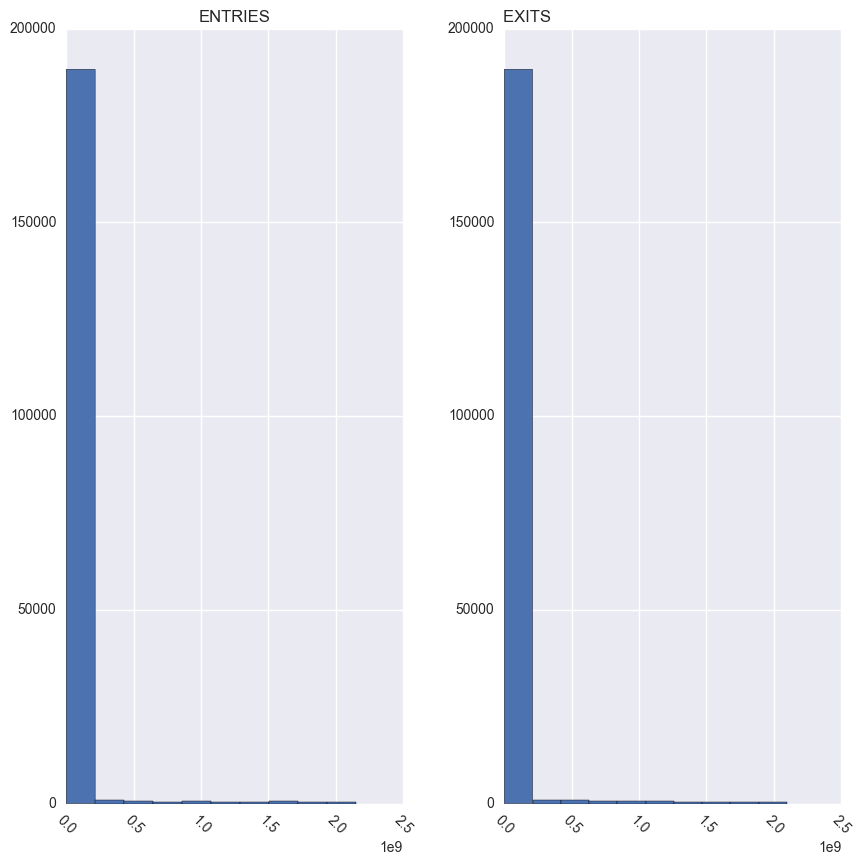

In [129]:
# Plot histogram grid
df.hist(figsize=(10,10),xrot=-45)
# Clear the text "residue"
plt.show()

**<span style="color:royalblue">Summary statistics</span> for the numeric features is displayed.**

In [130]:
# Summarize numerical features
df.describe()

,ENTRIES,EXITS
count,1.945160e+05,1.945160e+05
mean,3.504134e+07,2.851794e+07
std,1.950582e+08,1.750262e+08
min,0.000000e+00,0.000000e+00
25%,5.710910e+05,2.841978e+05
50%,2.551156e+06,1.481621e+06
75%,6.416372e+06,4.610988e+06
max,2.146689e+09,2.097170e+09


<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<span id="CDf"></span>
> # 1C. Distributions of categorical features


<br>
**First, display the <span style="color:royalblue">summary statistics</span> for categorical features in the dataset.**



In [131]:
# Summarize categorical features
df.describe(include=['object'])

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC
count,194516,194516,194516,194516,194516,194516,194516,194516,194516
unique,728,466,215,373,112,6,7,10938,2
top,PTH08,R549,00-00-00,34 ST-PENN STA,1,IRT,04/04/2016,16:00:00,REGULAR
freq,1079,2488,19556,4411,22688,72201,28375,16826,193958


In [1]:
# Plot bar plot for each categorical feature
# for feature in df.dtypes[df.dtypes=='object'].index :
#     sns.countplot(y=feature,data=df)
#     plt.show()

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

<span id="SEG"></span>
# 1D :  Segmentations

**First, display a <span style="color:royalblue">violin plot</span> with <code style="color:steelblue">'station'</code> on the y-axis and <code style="color:steelblue">'entries'</code> on the x-axis.**

In [2]:
# Segment satisfaction by station and entries distributions
# sns.violinplot(y='STATION',x='ENTRIES',data=df)

**<span style="color:royalblue">Group by</span> <code style="color:steelblue">'station'</code> and calculate the average value of each feature within each class.**

In [134]:
# Segment by station and display the means within each class
df.groupby('STATION').mean()

,ENTRIES,EXITS
STATION,,
1 AV,1.560300e+08,3.475417e+08
103 ST,1.015579e+07,3.781886e+07
103 ST-CORONA,6.967471e+06,6.667005e+06
104 ST,4.290571e+08,3.519246e+08
110 ST,4.380566e+06,4.513361e+06
111 ST,6.936795e+06,3.680622e+06
116 ST,7.773958e+07,9.415112e+07
116 ST-COLUMBIA,2.017665e+08,4.273358e+07
121 ST,1.601543e+06,1.322879e+06


In [135]:
#sns.lmplot(x='STATION', y='DATE', hue='ENTRIES', data=df, fit_reg=False)

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>

# Clean Data

In [136]:
df['DATE TIME'] = df['DATE'] + ' ' + df['TIME']

In [137]:
df['DATE TIME'] = pd.to_datetime(df['DATE TIME'])

In [138]:
df['DATE'] =pd.to_datetime(df['DATE'])

In [139]:
#df[df['C/A']=='A002']

In [140]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'DATE TIME'],
      dtype='object')

In [141]:
df['turnstile'] = df['C/A']+'_'+df['UNIT']+'_'+df['SCP']+'_'+df['STATION']

In [142]:
turnstile_list=df['turnstile'].unique()

In [143]:
len(df.groupby('turnstile').groups)

4595

In [144]:
unique_dates=df['DATE'].unique()

In [145]:
unique_dates   

array(['2016-04-02T00:00:00.000000000', '2016-04-03T00:00:00.000000000',
       '2016-04-04T00:00:00.000000000', '2016-04-05T00:00:00.000000000',
       '2016-04-06T00:00:00.000000000', '2016-04-07T00:00:00.000000000',
       '2016-04-08T00:00:00.000000000'], dtype='datetime64[ns]')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194516 entries, 0 to 194515
Data columns (total 13 columns):
C/A                                                                     194516 non-null object
UNIT                                                                    194516 non-null object
SCP                                                                     194516 non-null object
STATION                                                                 194516 non-null object
LINENAME                                                                194516 non-null object
DIVISION                                                                194516 non-null object
DATE                                                                    194516 non-null datetime64[ns]
TIME                                                                    194516 non-null object
DESC                                                                    194516 non-null object
ENTRIES                   

In [148]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE TIME,turnstile
0,A002,R051,02-00-00,59 ST,NQR456,BMT,2016-04-02,00:00:00,REGULAR,5600838,1896290,2016-04-02 00:00:00,A002_R051_02-00-00_59 ST
1,A002,R051,02-00-00,59 ST,NQR456,BMT,2016-04-02,04:00:00,REGULAR,5600863,1896293,2016-04-02 04:00:00,A002_R051_02-00-00_59 ST
2,A002,R051,02-00-00,59 ST,NQR456,BMT,2016-04-02,08:00:00,REGULAR,5600877,1896313,2016-04-02 08:00:00,A002_R051_02-00-00_59 ST
3,A002,R051,02-00-00,59 ST,NQR456,BMT,2016-04-02,12:00:00,REGULAR,5600922,1896375,2016-04-02 12:00:00,A002_R051_02-00-00_59 ST
4,A002,R051,02-00-00,59 ST,NQR456,BMT,2016-04-02,16:00:00,REGULAR,5601172,1896445,2016-04-02 16:00:00,A002_R051_02-00-00_59 ST


In [149]:
filter_p = (df['C/A']=='A002')

In [150]:
df[filter_p].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE TIME,turnstile
0,A002,R051,02-00-00,59 ST,NQR456,BMT,2016-04-02,00:00:00,REGULAR,5600838,1896290,2016-04-02 00:00:00,A002_R051_02-00-00_59 ST
1,A002,R051,02-00-00,59 ST,NQR456,BMT,2016-04-02,04:00:00,REGULAR,5600863,1896293,2016-04-02 04:00:00,A002_R051_02-00-00_59 ST
2,A002,R051,02-00-00,59 ST,NQR456,BMT,2016-04-02,08:00:00,REGULAR,5600877,1896313,2016-04-02 08:00:00,A002_R051_02-00-00_59 ST
3,A002,R051,02-00-00,59 ST,NQR456,BMT,2016-04-02,12:00:00,REGULAR,5600922,1896375,2016-04-02 12:00:00,A002_R051_02-00-00_59 ST
4,A002,R051,02-00-00,59 ST,NQR456,BMT,2016-04-02,16:00:00,REGULAR,5601172,1896445,2016-04-02 16:00:00,A002_R051_02-00-00_59 ST


In [151]:
df['C/A'].unique()

array(['A002', 'A006', 'A007', 'A010', 'A011', 'A013', 'A014', 'A015',
       'A016', 'A021', 'A022', 'A025', 'A027', 'A029', 'A030', 'A031',
       'A033', 'A034', 'A035', 'A037', 'A038', 'A039', 'A041', 'A042',
       'A043', 'A046', 'A047', 'A049', 'A050', 'A054', 'A055', 'A058',
       'A060', 'A061', 'A064', 'A066', 'A069', 'A071', 'A077', 'A081',
       'A082', 'A083', 'A084', 'A085', 'B004', 'B009', 'B010', 'B012',
       'B013', 'B014', 'B015', 'B016', 'B017', 'B018', 'B019', 'B020',
       'B021', 'B022', 'B023', 'B024', 'B024A', 'B025', 'B026', 'B027',
       'B028', 'B029', 'B031', 'B032', 'B034', 'C001', 'C003', 'C004',
       'C008', 'C009', 'C010', 'C011', 'C012', 'C014', 'C015', 'C016',
       'C017', 'C018', 'C019', 'C020', 'C021', 'C022', 'C023', 'C024',
       'C025', 'C026', 'C027', 'C028', 'D002', 'D003', 'D005', 'D008',
       'D009', 'D010', 'D012', 'D015', 'D016', 'E001', 'E003', 'E004',
       'E005', 'E009', 'E011', 'E012', 'E013', 'E014', 'E015', 'E016',
     

In [152]:
txt_docs_list = ['turnstile_160409.txt', 'turnstile_180310.txt', 'turnstile_180317.txt',
                 'turnstile_180324.txt', 'turnstile_180331.txt', 'turnstile_180407.txt']

df_list = []
for x in range(1):
    df_x = pd.read_csv(txt_docs_list[x])
    df_list.append(df_x)

df = pd.concat(df_list)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194516 entries, 0 to 194515
Data columns (total 11 columns):
C/A                                                                     194516 non-null object
UNIT                                                                    194516 non-null object
SCP                                                                     194516 non-null object
STATION                                                                 194516 non-null object
LINENAME                                                                194516 non-null object
DIVISION                                                                194516 non-null object
DATE                                                                    194516 non-null object
TIME                                                                    194516 non-null object
DESC                                                                    194516 non-null object
ENTRIES                           

#### Reduce the size of the doc

In [153]:
df['ENTRIES'] = df['ENTRIES'].astype('int32')
df['DIVISION'] = df['DIVISION'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194516 entries, 0 to 194515
Data columns (total 11 columns):
C/A                                                                     194516 non-null object
UNIT                                                                    194516 non-null object
SCP                                                                     194516 non-null object
STATION                                                                 194516 non-null object
LINENAME                                                                194516 non-null object
DIVISION                                                                194516 non-null category
DATE                                                                    194516 non-null object
TIME                                                                    194516 non-null object
DESC                                                                    194516 non-null object
ENTRIES                         

#### Convert columns (datetime, etc.)

In [154]:
df['DATETIME'] = df['DATE'] + ' ' + df['TIME']
df['DATETIME'] = pd.to_datetime(df['DATETIME'])
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/02/2016,00:00:00,REGULAR,5600838,1896290,2016-04-02 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/02/2016,04:00:00,REGULAR,5600863,1896293,2016-04-02 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/02/2016,08:00:00,REGULAR,5600877,1896313,2016-04-02 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/02/2016,12:00:00,REGULAR,5600922,1896375,2016-04-02 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/02/2016,16:00:00,REGULAR,5601172,1896445,2016-04-02 16:00:00


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194516 entries, 0 to 194515
Data columns (total 12 columns):
C/A                                                                     194516 non-null object
UNIT                                                                    194516 non-null object
SCP                                                                     194516 non-null object
STATION                                                                 194516 non-null object
LINENAME                                                                194516 non-null object
DIVISION                                                                194516 non-null category
DATE                                                                    194516 non-null object
TIME                                                                    194516 non-null object
DESC                                                                    194516 non-null object
ENTRIES                         